<a href="https://colab.research.google.com/github/jackyjack00/Machine_Learning_Deep_Learning_LAB/blob/main/Es2_1_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iris Dataset used for clustering analysis

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

x , y = load_iris(return_X_y = True)
scaler = StandardScaler()
x = scaler.fit_transform(x)

Using KMeans

In [ ]:
from sklearn.cluster import KMeans

clf = KMeans( n_clusters = 3 )
y_pred = clf.fit_predict(x)

In [ ]:
from sklearn.metrics import accuracy_score

print( accuracy_score(y, y_pred) )

0.24


How much sensible is the KMeans to the initial random seed

In [ ]:
import numpy as np
from sklearn.metrics import rand_score , adjusted_rand_score , v_measure_score, silhouette_score , homogeneity_score
from prettytable import PrettyTable

random_seeds = np.random.random( 15 ) * 100
tbl = PrettyTable(["Random Seed" , "Rand Score" , "V Measure" , "Silhouette"])

for seed in random_seeds:
  clf = KMeans( n_clusters = 3 , random_state = int(seed) , n_init=3)
  y_pred = clf.fit_predict( x )
  tbl.add_row([ int(seed) , rand_score(y, y_pred) , v_measure_score(y,y_pred) , silhouette_score(x , y_pred) ] )

print(tbl)

+-------------+--------------------+--------------------+---------------------+
| Random Seed |     Rand Score     |     V Measure      |      Silhouette     |
+-------------+--------------------+--------------------+---------------------+
|      10     | 0.8322147651006712 | 0.659486892724918  | 0.45994823920518635 |
|      98     | 0.8322147651006712 | 0.659486892724918  | 0.45994823920518635 |
|      18     | 0.8195973154362416 | 0.6426583176523606 |  0.4630420362927048 |
|      36     | 0.8322147651006712 | 0.659486892724918  | 0.45994823920518635 |
|      75     | 0.8195973154362416 | 0.6426583176523606 |  0.4630420362927048 |
|      54     | 0.8322147651006712 | 0.659486892724918  | 0.45994823920518635 |
|      63     | 0.8278299776286353 | 0.6525582020084983 | 0.45937792074496625 |
|      24     | 0.8195973154362416 | 0.6426583176523606 |  0.4630420362927048 |
|      94     | 0.8195973154362416 | 0.6426583176523606 |  0.4630420362927048 |
|      96     | 0.8195973154362416 | 0.6

How the KMeans changes with different K

In [ ]:
initial_k = range(2,21)
tbl = PrettyTable(["K" , "Rand Score" , "Homogeneity", "V Measure" , "Silhouette"])

for k in initial_k:
  clf = KMeans( n_clusters = k , random_state = 42)
  y_pred = clf.fit_predict( x )
  tbl.add_row([ k , rand_score(y, y_pred) , homogeneity_score( y , y_pred) ,  v_measure_score(y,y_pred) , silhouette_score(x , y_pred) ] )

In [ ]:
print(tbl)

+----+--------------------+--------------------+--------------------+---------------------+
| K  |     Rand Score     |    Homogeneity     |     V Measure      |      Silhouette     |
+----+--------------------+--------------------+--------------------+---------------------+
| 2  | 0.7762863534675615 | 0.5793801642856945 | 0.7336804366512104 |  0.5817500491982808 |
| 3  | 0.8322147651006712 | 0.6591265018049008 | 0.659486892724918  | 0.45994823920518635 |
| 4  | 0.7770917225950783 | 0.659126501804901  | 0.597298051997623  | 0.38694104154427816 |
| 5  | 0.7660850111856823 | 0.7149866659168685 | 0.5893294309619321 | 0.34194697093163473 |
| 6  |  0.74917225950783  | 0.6980614975372345 | 0.5411519851174091 | 0.32674451109112396 |
| 7  |  0.73082774049217  | 0.6971297846638561 | 0.5156601962980975 | 0.32413601115437884 |
| 8  | 0.7704697986577181 | 0.8117650122961333 | 0.5736551569850284 |  0.3328739067356281 |
| 9  | 0.7686800894854586 | 0.8346341630343023 | 0.5823343020417578 |  0.3561629

How does the PCA effect the clustering

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(2)
x_pca = pca.fit_transform(x)

tbl = PrettyTable(["K" , "Rand Score" , "Homogeneity", "V Measure" , "Silhouette"])

for k in initial_k:
  clf = KMeans( n_clusters = k , random_state = 42)
  y_pred = clf.fit_predict( x_pca )
  tbl.add_row([ k , rand_score(y, y_pred) , homogeneity_score( y , y_pred) ,  v_measure_score(y,y_pred) , silhouette_score(x , y_pred) ] )

In [ ]:
print(tbl)

+----+--------------------+--------------------+---------------------+---------------------+
| K  |     Rand Score     |    Homogeneity     |      V Measure      |      Silhouette     |
+----+--------------------+--------------------+---------------------+---------------------+
| 2  | 0.7762863534675615 | 0.5793801642856945 |  0.7336804366512104 |  0.5817500491982808 |
| 3  | 0.8322147651006712 | 0.6591265018049008 |  0.659486892724918  | 0.45994823920518635 |
| 4  | 0.7677852348993288 | 0.6468896368322279 |  0.5862088399862003 |  0.3834502194834102 |
| 5  | 0.7727964205816554 | 0.7465020069391013 |  0.6153866903354062 |  0.3459012795948778 |
| 6  | 0.8025950782997763 | 0.7725252360625122 |  0.5988879818323495 | 0.35120856667205635 |
| 7  | 0.7775391498881432 | 0.805176930021876  |  0.5962837764624445 |  0.3405267155913748 |
| 8  | 0.7716331096196868 | 0.7820039058613312 |  0.5657786288155726 |  0.3457640275334027 |
| 9  | 0.7513199105145414 | 0.8174736325633255 |  0.5575291255502057 |

Graph the PCA-ed dataset grouped by clusters

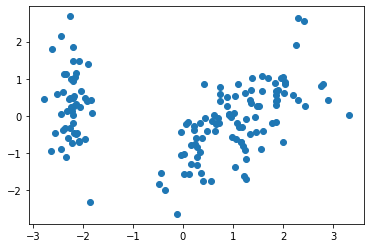

In [ ]:
import matplotlib.pyplot as plt

plt.scatter( x_pca[:,0] , x_pca[:,1] )

In [ ]:
clf = KMeans( n_clusters = 3 , random_state = 42)
y_pred = clf.fit_predict( x_pca )

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


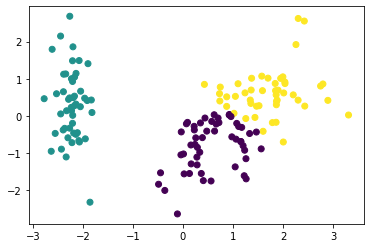

In [ ]:
plt.scatter( x_pca[:,0] , x_pca[:,1] , c = y_pred)

+---+------------+-------------+-----------+--------------------+
| K | Rand Score | Homogeneity | V Measure |     Silhouette     |
+---+------------+-------------+-----------+--------------------+
| 3 |    1.0     |     1.0     |    1.0    | 0.3811261580543803 |
+---+------------+-------------+-----------+--------------------+


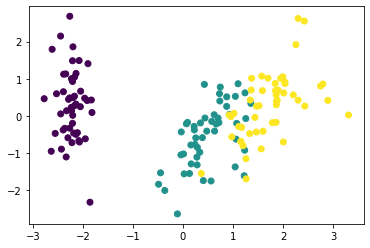

In [ ]:
plt.scatter( x_pca[:,0] , x_pca[:,1] , c = y)
tbl = PrettyTable(["K" , "Rand Score" , "Homogeneity", "V Measure" , "Silhouette"])
tbl.add_row([ 3 , rand_score(y, y) , homogeneity_score( y , y) ,  v_measure_score(y,y) , silhouette_score(x , y) ] )
print(tbl)

Try a GMM approach to clustering

+---+--------------------+--------------------+--------------------+---------------------+
| K |     Rand Score     |    Homogeneity     |     V Measure      |      Silhouette     |
+---+--------------------+--------------------+--------------------+---------------------+
| 3 | 0.9574944071588367 | 0.8983263672602775 | 0.8996935451597475 | 0.37416491866541235 |
+---+--------------------+--------------------+--------------------+---------------------+


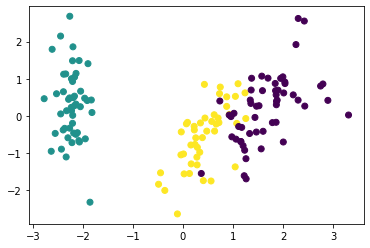

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture( n_components=3).fit(x)
y_pred = gmm.predict(x)

plt.scatter( x_pca[:,0] , x_pca[:,1] , c = y_pred)
tbl = PrettyTable(["K" , "Rand Score" , "Homogeneity", "V Measure" , "Silhouette"])
tbl.add_row([ 3 , rand_score(y, y_pred) , homogeneity_score( y , y_pred) ,  v_measure_score(y,y_pred) , silhouette_score(x , y_pred) ] )
print(tbl)